In [15]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score 

In [16]:
# Monta dataframe com nome dos arquivos
fn1 = os.listdir("D:/DropB/Faculeste/TCC/Imagens/COVID-19_Radiography_Dataset/Normal2/images")
fn2 = os.listdir("D:/DropB/Faculeste/TCC/Imagens/COVID-19_Radiography_Dataset/COVID/images")

ct1 = []
for fn in fn1:
  ct1.append([0])

df1 = pd.DataFrame({
  'arquivo': fn1,    
  'categoria': ct1   # Normal
})
#df1

ct2 = []
for fn in fn2:
  ct2.append([1])

df2 = pd.DataFrame({
  'arquivo': fn2,
  'categoria': ct2   # COVID
})
df = df1.append(df2)

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_3280\3298725548.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [17]:
# gerando dataframes de treinamento e de teste
dfTreinamento = df.sample(frac=0.7, random_state=100) # 70% de treinamento
dfTeste = df[~df['arquivo'].isin(dfTreinamento['arquivo'])]     # 30% de teste

In [18]:
len(dfTeste)

2190

In [19]:
width = 64
height = 64
depth = 3
classes = 2
inputShape = (height, width, depth)

In [20]:
imgGen = ImageDataGenerator(rescale = 1./255, 
                            shear_range=0.25, 
                            zoom_range = 0.25, 
                            horizontal_flip = True)

conjTreinamento = imgGen.flow_from_dataframe(dfTreinamento, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=5000, 
                                  class_mode='categorical')

conjTeste = imgGen.flow_from_dataframe(dfTeste, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=2000, 
                                  class_mode='categorical')

Found 5110 validated image filenames belonging to 2 classes.
Found 2190 validated image filenames belonging to 2 classes.


In [21]:
# Lenet5 - Ajustar imagens para 32 x 32
from leNet5M import LeNet5M
lntClf = LeNet5M()
lntClf = lntClf.build(h=height, w=width, prof=3, cl=2)
lntClf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 6)         906       
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 dense_3 (Dense)             (None, 13, 13, 120)       840       
                                                                 
 flatten_1 (Flatten)         (None, 20280)            

c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
spe = 2
epc = 100
vls = 2

In [23]:
print("LeNet ***************************************************")
h1 = lntClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

LeNet ***************************************************
Epoch 1/100
2/2 [==============================] - 32s 13s/step - loss: 0.7052 - accuracy: 0.5491 - val_loss: 5.3262 - val_accuracy: 0.5018
Epoch 2/100
2/2 [==============================] - 27s 27s/step - loss: 3.9565 - accuracy: 0.4953 - val_loss: 2.3378 - val_accuracy: 0.5018
Epoch 3/100
2/2 [==============================] - 27s 27s/step - loss: 1.6274 - accuracy: 0.4914 - val_loss: 2.0224 - val_accuracy: 0.5018
Epoch 4/100
2/2 [==============================] - 27s 8s/step - loss: 2.0042 - accuracy: 0.5039 - val_loss: 2.1913 - val_accuracy: 0.5018
Epoch 5/100
2/2 [==============================] - 27s 27s/step - loss: 1.1990 - accuracy: 0.4953 - val_loss: 1.7885 - val_accuracy: 0.5018
Epoch 6/100
2/2 [==============================] - 27s 7s/step - loss: 1.7598 - accuracy: 0.5074 - val_loss: 1.5023 - val_accuracy: 0.5018
Epoch 7/100
2/2 [==============================] - 27s 27s/step - loss: 1.4066 - accuracy: 0.4945 - val_

In [28]:
# gerando o Vetor de Categorias
categorias = []
for i in conjTeste[0][1]:
    categorias.append(0 if i[0] > 0.0 else 1)
prdLnt = lntClf.predict(conjTeste[0][0])
predLeNet = []
for i in prdLnt:
    predLeNet.append(0 if i[0] >= 0.5 else 1)

63/63 [==============================] - 1s 13ms/step


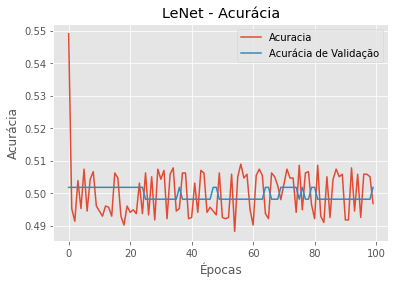

In [30]:
# Gráfico de Acurácia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epc), h1["accuracy"], label="Acuracia")
plt.plot(np.arange(0, epc), h1["val_accuracy"], label="Acurácia de Validação")
plt.title("LeNet - Acurácia")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

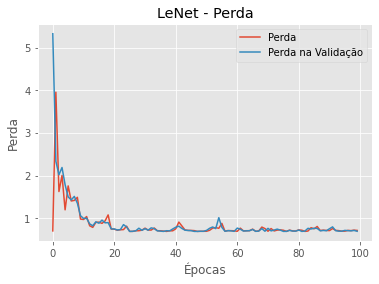

In [31]:
# Gráfico de Acurácia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epc), h1["loss"], label="Perda")
plt.plot(np.arange(0, epc), h1["val_loss"], label="Perda na Validação")
plt.title("LeNet - Perda")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()

In [32]:
print("LeNet: ")
print(".......... Acuracia: ", accuracy_score(categorias, predLeNet))
print(".......... Precisão: ", precision_score(categorias, predLeNet))
print(".......... Recall  : ", recall_score(categorias, predLeNet))
print(".......... F1-Score: ", f1_score(categorias, predLeNet))

LeNet: 
.......... Acuracia:  0.5
.......... Precisão:  0.0
.......... Recall  :  0.0
.......... F1-Score:  0.0


c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
